# Homework 1
### ASTROINFORMATICS FALL 2018
https://github.com/astromundus/astroinfo2018


## Problem 1

Using astroML figure 3.12 as a template, see

http://www.astroml.org/book_figures/chapter3/fig_cauchy_median_mean.html

add another panel, similar to the top panel, that will plot and compare 
results for standard deviation and $\sigma_G$. 


## Problem 2

Generate a sample of 10,000 data values drawn from N($\mu$=1.0, $\sigma$=0.2) and
draw a pretty histogram, with the bin size determined using the Freedman-Diaconis
rule. Show (Poissonian) uncertainty for each histogram value, and overplot the
true distribution. 

## Problem 3

Do the same for a Cauchy distribution with the same $\mu$ and $\gamma=0.2$. 

## Problem 4
Repeat the problem 2, but now add to the Gaussian sample (concatenate arrays) 
another sample of 10,000 data values drawn from a Cauchy distribution with
$\mu=2.0$ and $\gamma=0.5$. Do it twice: once with the bin size determined 
using the Freedman-Diaconis rule and once using the Scott's rule. Discuss the difference.  

<br>
# Solutions

### Some useful definitions and functions

In [38]:
import numpy as np
from matplotlib import pyplot as plt

This astroML function adjusts matplotlib settings for a uniform feel in the 
textbook. Note that with `usetex=True`, fonts are rendered with $\LaTeX$. This 
may result in an error if $\LaTeX$ is not installed on your system.  In that 
case, you can set usetex to `False`.

In [39]:
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)

## Problem 1
Add another panel, similar to the top panel, that will plot and compare results for standard deviation and σ$_G$. 

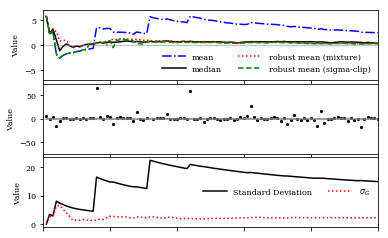

In [40]:
# The third plot that compare with standard deviation and σ$_G$ is after the ######### line.
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from astroML import stats as astroMLstats
from matplotlib import pyplot as plt
from scipy import optimize
from scipy.stats import cauchy, norm

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)


def robust_mean_mixture(x):
    """Compute the mean via a mixture of two Gaussians

    One Gaussian accounts for outliers, and one Gaussian accounts  for
    the true distribution.  This cannot be computed analytically, so
    it uses scipy's function optimization
    """
    if len(x) == 1:
        return x

    x = x.ravel()

    mu_bg = np.mean(x)
    sig_bg = 3 * np.std(x)

    likelihood = lambda v: -np.sum(np.log(norm.pdf(x, v[0], v[1])
                                          + norm.pdf(x, mu_bg, sig_bg)))

    v0 = np.array([0, 30])

    v_best = optimize.fmin(likelihood, v0, disp=False)

    return v_best[0]


def robust_mean_iterated(x, sigma_cut=3):
    """Compute the robust mean iteratively

    After computing the mean, points further than 3 sigma from the mean
    are removed and the result is repeated until convergence.
    """
    flag = np.ones(x.shape, dtype=bool)
    n_to_keep = x.size

    while True:
        xf = x[flag]
        mu = xf.mean()
        sig = xf.std()
        if len(xf) == 1:
            break

        x_sig = abs((x - mu) / sig)

        too_far = (x_sig > sigma_cut)
        flag[too_far] = False
        n_flag = flag.sum()

        if n_flag == n_to_keep:
            break
        else:
            n_to_keep = n_flag

    return mu

#------------------------------------------------------------
# Create the distribution and compute means and medians
np.random.seed(6)
mu = 0
gamma = 2

xi = cauchy(mu, gamma).rvs(100)
Nrange = np.arange(1, len(xi) + 1)

mean = [np.mean(xi[:N]) for N in Nrange]
median = [np.median(xi[:N]) for N in Nrange]
mean_mixture = [robust_mean_mixture(xi[:N]) for N in Nrange]
mean_iter = [robust_mean_iterated(xi[:N]) for N in Nrange]

###########################
# Compute standard deviation and σ_G
std = [np.std(xi[:N]) for N in Nrange]
sigma_G = [astroMLstats.sigmaG(xi[:N]) for N in Nrange]



#------------------------------------------------------------
# Plot the results as a function of number of points
fig,(ax1,ax2,ax3) = plt.subplots(3, 1, sharex=True)
fig.subplots_adjust(hspace=0.05)

# first plot the mean

ax1.plot(Nrange, mean, '-.b', label='mean')
ax1.plot(Nrange, median, '-k', label='median')
ax1.plot(Nrange, mean_mixture, ':r', label='robust mean (mixture)')
ax1.plot(Nrange, mean_iter, '--g', label='robust mean (sigma-clip)')
ax1.plot(Nrange, 0 * Nrange, '-', c='gray', lw=0.5)

ax1.set_xlim(0, 100)
ax1.set_ylim(-7, 7)
ax1.legend(loc=4, ncol=2, frameon=False)
ax1.set_ylabel('Value')
ax1.xaxis.set_major_formatter(plt.NullFormatter())

# now plot the median

ax2.scatter(Nrange, xi, lw=0, s=10, c='k')
ax2.plot(Nrange, 0 * Nrange, '-', c='gray')
ax2.set_xlim(0, 100)
ax2.set_ylim(-75, 75)
ax2.set_xlabel('Sample Size')
ax2.set_ylabel('Value')
####################################
# Plot standard deviation and $\sigma_G$

ax3.plot(Nrange, std, '-k', label="Standard Deviation")
ax3.plot(Nrange, sigma_G, ':r', label = "$\sigma_G$ ")
ax3.legend(loc=7, ncol=2, frameon=False)
ax3.set_ylabel('Value')




plt.show()


## Problem 2
Generate a sample of 10,000 data values drawn from N(μ=1.0, σ=0.2) and draw a pretty histogram, with the bin size determined using the Freedman-Diaconis rule. Show (Poissonian) uncertainty for each histogram value, and overplot the true distribution. 

/home/fuchi/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'p(x)')

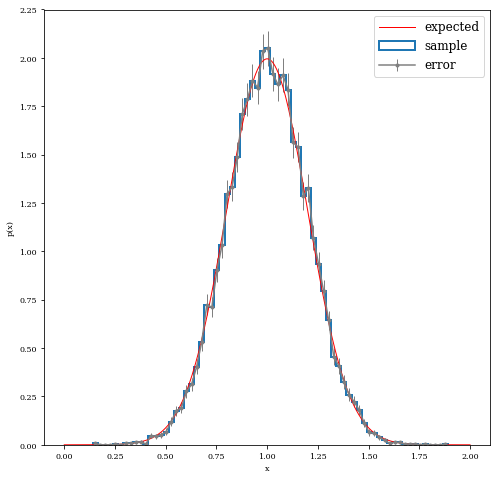

In [41]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm
import astroML
from astroML.plotting import hist as fancyhist

plt.figure(figsize=(8,8))

sampleSize = 10**4
mu = 1.0
sigma = 0.2
gaussSample = norm(mu, sigma).rvs(sampleSize)

# Normalized histogram
hist = fancyhist(gaussSample, bins="freedman", histtype='step', normed=True,lw=2, label="sample")
n = hist[0]
bin_edges = hist[1]
bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
uncertainty = np.sqrt(n)/np.sqrt(sampleSize*(bin_edges[1]-bin_edges[0]))

# True distribution
x = np.linspace(0, 2, 1000)
gauss = norm(mu, sigma).pdf(x)  # this is a function of x: gauss(x)

# Plot
plt.plot(x, gauss, ls='-', c='r',lw=1, label='expected')
plt.errorbar(bin_centers, n, yerr = uncertainty, marker = '.',c='grey',elinewidth=1, label="error")
plt.legend(prop={'size': 12})
plt.xlabel('x')
plt.ylabel('p(x)')




## Problem 3
Do the same for a Cauchy distribution with the same $\mu$ and $\gamma=0.2$. 

/home/fuchi/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'p(x)')

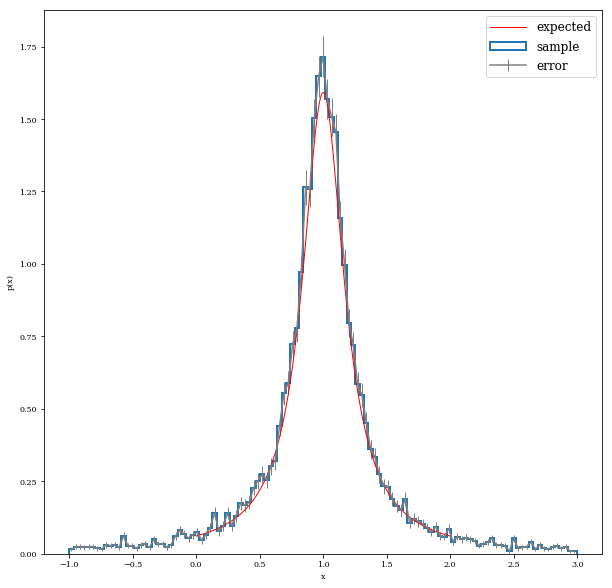

In [42]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import cauchy
import astroML
from astroML.plotting import hist as fancyhist

plt.figure(figsize=(10,10))


sampleSize = 10**4
mu = 1.0
sigma = 0.2
cauchySample = cauchy(mu, sigma).rvs(sampleSize)

# Normalized histogram
hist = fancyhist(cauchySample, bins="freedman", histtype='step',range=(-1,3),normed=True,lw=2 ,label="sample")
n = hist[0]
bin_edges = hist[1]
bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
uncertainty = np.sqrt(n)/np.sqrt(sampleSize*(bin_edges[1]-bin_edges[0]))

# True distribution
x = np.linspace(0, 2, 1000)
gauss = cauchy(mu, sigma).pdf(x)  # this is a function of x: gauss(x)

# PLot
plt.plot(x, gauss, ls='-', lw=1, c='red', label='expected')
plt.errorbar(bin_centers, n, yerr = uncertainty, marker = '',color='grey',elinewidth=1,capsize=None, label="error")
plt.legend(prop={'size': 12})
plt.xlabel('x')
plt.ylabel('p(x)')


# From Q2. and Q3., we can see that Freedman-Diaconis rule suits better for Cauchy districutiin.

## Problem 4
Repeat the problem 2, but now add to the Gaussian sample (concatenate arrays) another sample of 10,000 data values drawn from a Cauchy distribution with μ=2.0 and γ=0.5. Do it twice: once with the bin size determined using the Freedman-Diaconis rule and once using the Scott's rule. Discuss the difference. 

/home/fuchi/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Freedman's rule: 54 bins


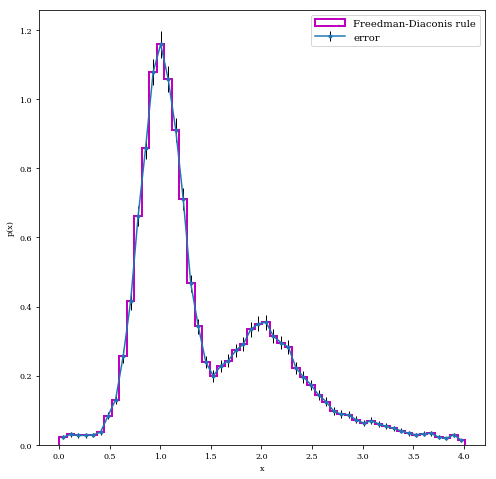

In [43]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import cauchy, norm
import astroML
from astroML.plotting import hist as fancyhist
plt.figure(figsize=(8,8))

# Gaussian sample
sampleSize = 10**4
mu = 1.0
sigma = 0.2
gaussSample = norm(mu, sigma).rvs(sampleSize)

# Cauchy sample
add_sample = 10**4
cauchy_mu = 2.0
cauchy_sigma = 0.5
cauchySample = cauchy(cauchy_mu, cauchy_sigma).rvs(add_sample)

# Combine Gauss and Cauchy sample
Sample = np.concatenate((gaussSample, cauchySample),axis=0)

# True Gauss distribution
x = np.linspace(0, 4, 1000)
gauss = norm(mu, sigma).pdf(x)  

# True Cauchy distribution
x = np.linspace(0, 4, 1000)
cauchy = cauchy(cauchy_mu, cauchy_sigma).pdf(x)  


# Histogram
hist1 = fancyhist(Sample, bins="freedman", histtype='step',range=(0,4), lw=2, normed=True, color='m',label='Freedman-Diaconis rule')
n = hist1[0]
bin_edges = hist1[1]
bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
uncertainty = np.sqrt(n)/np.sqrt(sampleSize*(bin_edges[1]-bin_edges[0]))

# Plot
plt.errorbar(bin_centers, n, yerr = uncertainty , marker = '.',ecolor='k',elinewidth=1,capsize=None, label="error")

#plt.plot(x, 0.5*gauss+0.5*cauchy, ls=':', lw=1, c='c', label='expected ')


plt.legend(prop={'size': 10})
plt.xlabel('x')
plt.ylabel('p(x)')


print("Freedman's rule:",len(hist1[0]),"bins")


/home/fuchi/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Scott's rule: 43 bins


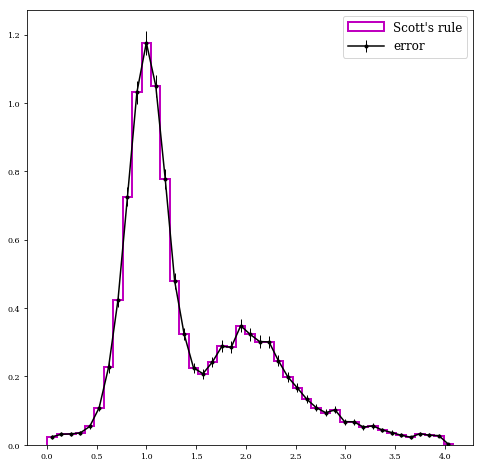

In [44]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import cauchy, norm
import astroML
from astroML.plotting import hist as fancyhist
plt.figure(figsize=(8,8))

# Gaussian sample
sampleSize = 10**4
mu = 1.0
sigma = 0.2
gaussSample = norm(mu, sigma).rvs(sampleSize)

# Cauchy sample
add_sample = 10**4
cauchy_mu = 2.0
cauchy_sigma = 0.5
cauchySample = cauchy(cauchy_mu, cauchy_sigma).rvs(add_sample)

# Combine Gauss and Cauchy sample
Sample = np.concatenate((gaussSample, cauchySample), axis=0)

# True Gauss distribution
x = np.linspace(0, 4, 1000)
gauss = norm(mu, sigma).pdf(x)  

# True Cauchy distribution
x = np.linspace(0, 4, 1000)
cauchy = cauchy(cauchy_mu, cauchy_sigma).pdf(x)  

# Histogram
hist2 = fancyhist(Sample, bins="scott", histtype='step',range=(0,4),lw=2, normed=True, color='m',label="Scott's rule",)

n = hist2[0]
bin_edges = hist2[1]
bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])

uncertainty = np.sqrt(n)/np.sqrt(sampleSize*(bin_edges[1]-bin_edges[0]))

# Plot
plt.errorbar(bin_centers, n, yerr = uncertainty, marker = '.',color='k',elinewidth=1,capsize=None, label="error")

#plt.plot(x, 0.5*gauss+0.5*cauchy, ls=':', lw=1, c='c', label='expected ')
plt.legend(prop={'size': 12})

print("Scott's rule:",len(hist2[0]),"bins")


From above plots , Scott's bins are larger than Freedman ones. 
And for Cauchy distribution, it is better to use Freedmann's rule.
For Gauss distribution, there is no difference between this two plots. 